# Telco Classification Project
by Joshua Bryant

## What We'll Discover Today:
- What our leading drivers for churn are at Telco 
- What Machine Learning models help us accurately predict customer churn

## Executive Summary
- Using different Machine Learning classification models, I was able to predict leading drivers of churn
- My Random Forrest Classifier ended up being my best performing model, beating the baseline accuracy of 73% with a test accuracy of 79%
- The top features chosen by the Random Forrest Classifier were tenure, contract_type, total_charges, monthly_charges, and customers with fiber optic internet
- Based on prior exploration to this project, I still believe our we can lower our Fiber Optic price by offering it without the phone plan attached to it to lower the churn price threshold

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics
from scipy import stats

# Custom Modules
from acquire import *
from prepare import *
from explore import *

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Acquire the Data

In [2]:
# Use custom acquire.py module to read data from sql query
df = get_telco_data()

In [3]:
# Taking a look at the top 5 rows
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [4]:
# How many rows and columns are we working with?
print(df.shape[0], "rows")
print(df.shape[1], "columns")

7043 rows
24 columns


In [5]:
# Lets take a look at what kind of data we're working with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

#### Takeaways:
- Our data will need a bit of encoding, which will happen after we take a look at distributions so our data is more meaningful
- Why is total_charges an object? 🤔 ...

In [6]:
# Let's take a closer look
df.total_charges.value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
5166.2      1
1653.85     1
7840.6      1
2243.9      1
156.25      1
Name: total_charges, Length: 6531, dtype: int64

In [7]:
# Curious about that blank value...
df[df.total_charges == ' ']

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
3977,2,2,3,2923-ARZLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,Yes,19.70,,No,None,One year,Mailed check
5512,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,None,Two year,Mailed check
5548,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,None,Two year,Mailed check
5558,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,None,Two year,Mailed check
5629,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,None,Two year,Mailed check
5838,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,None,Two year,Mailed check
6500,4,3,1,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,DSL,Two year,Credit card (automatic)
6571,3,3,1,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,DSL,Two year,Bank transfer (automatic)
6651,2,3,1,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,DSL,Two year,Mailed check
6670,3,3,1,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,DSL,Two year,Bank transfer (automatic)


 - Looking at these 11 customers, their tenure = 0, which tells me they're new customers that haven't accumulated any charges.
 - Their information is not going to be useful for my model, so I feel okay omitting them, will do so when I prep my data

### Let's look at some distributions

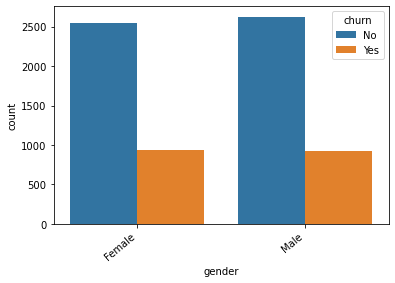

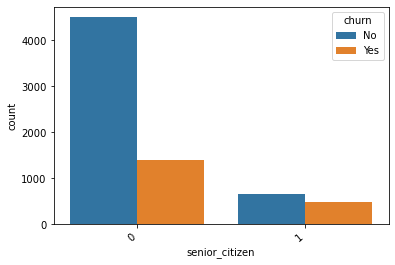

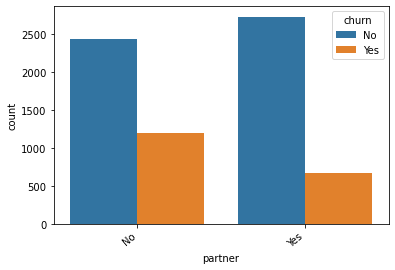

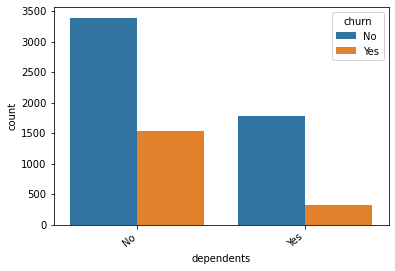

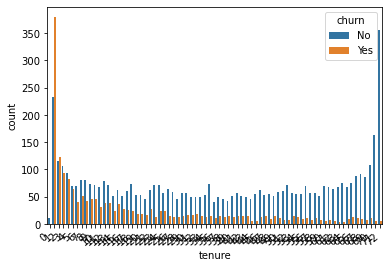

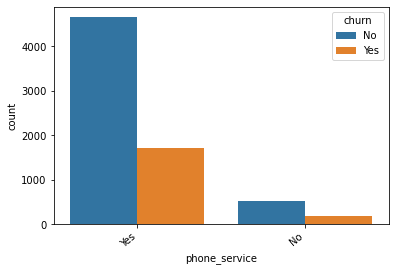

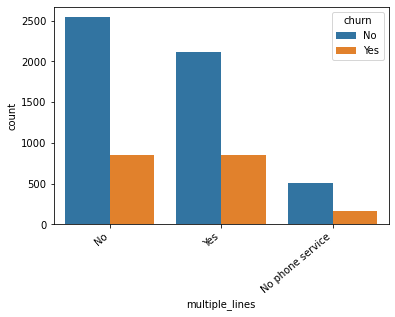

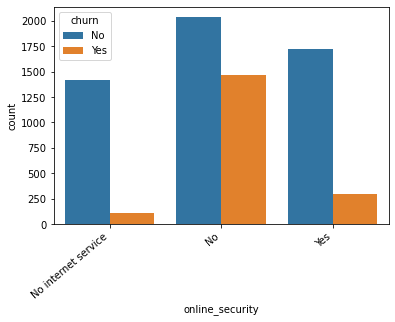

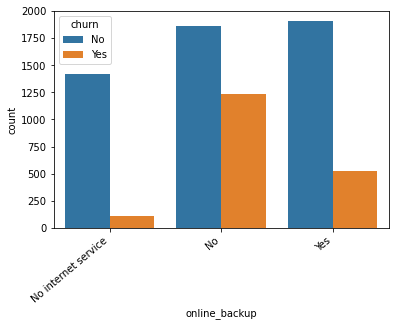

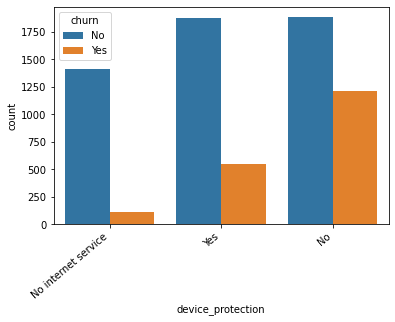

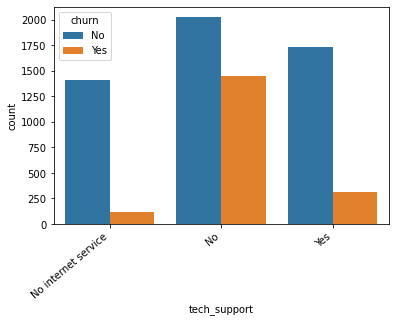

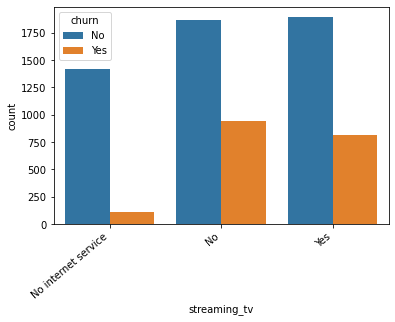

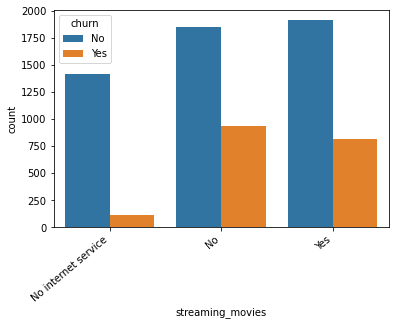

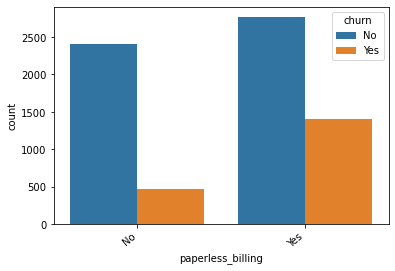

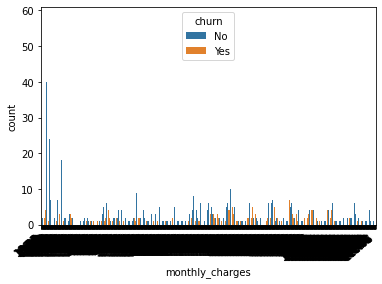

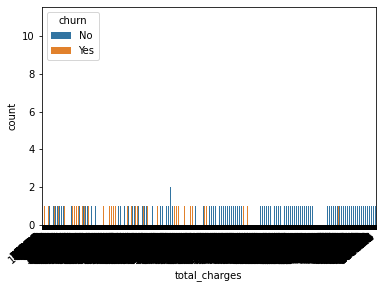

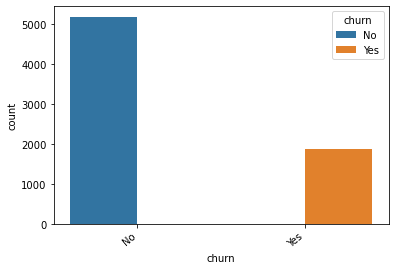

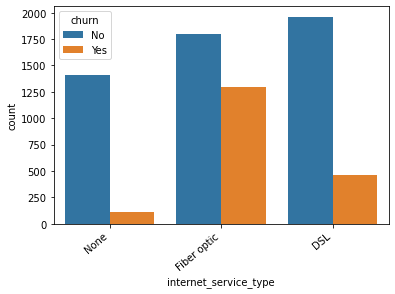

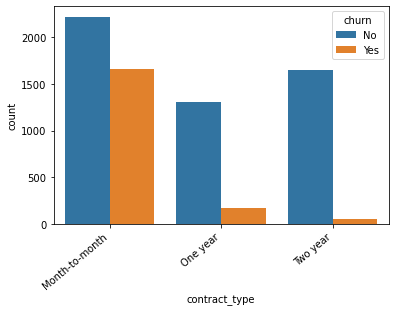

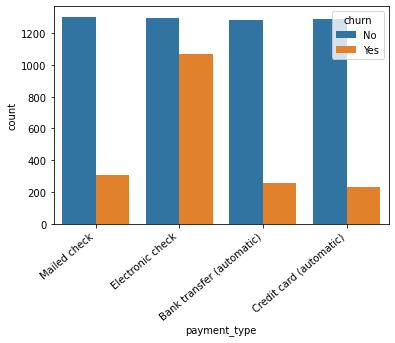

In [8]:
# Getting a high level overview of my data without id columns, highlighting my target: churn
for col in df.drop(columns = ['payment_type_id','contract_type_id','internet_service_type_id','customer_id']):
    ax = sns.countplot(x=df[col], hue='churn', data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

#### Let's get a closer look at a couple of those:

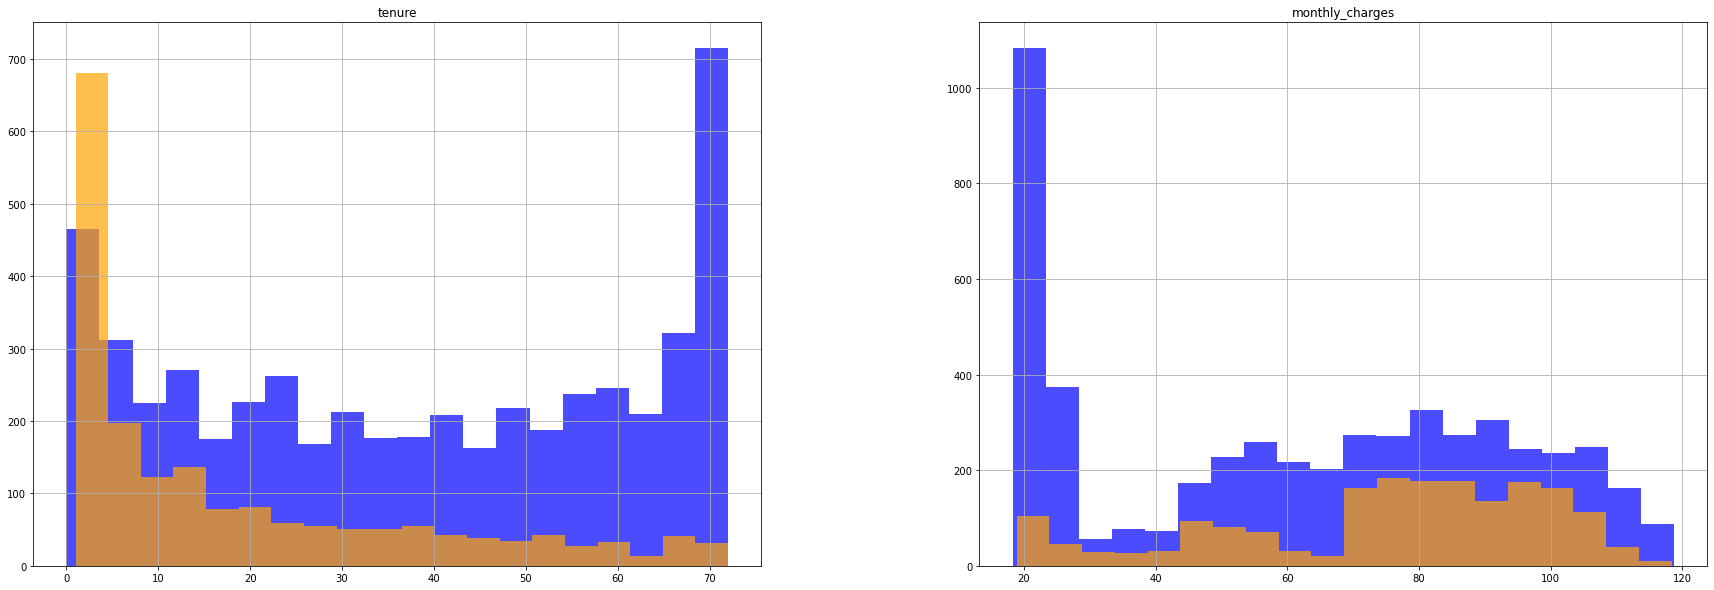

In [9]:
# Visualizing churn based on tenure and monthly_charges
not_churned = df[df['churn']=='No']
churned = df[df['churn']=='Yes']
features = ['tenure','monthly_charges']
fig, ax = plt.subplots(1, 2, figsize=(30,10))
not_churned[features].hist(bins=20, color='blue', alpha=0.7, ax=ax)
churned[features].hist(bins=20, color='orange', alpha=0.7, ax=ax)
plt.show()

Adjusted Fiber Optic Rate =  Fiber Optic without the phone plan attached, lowering it by an average of $20 and lowering the overall monthly charges for our customers

![Average%20Monthly%20Charges%20%281%29%20(1).png](attachment:Average%20Monthly%20Charges%20%281%29%20(1).png)
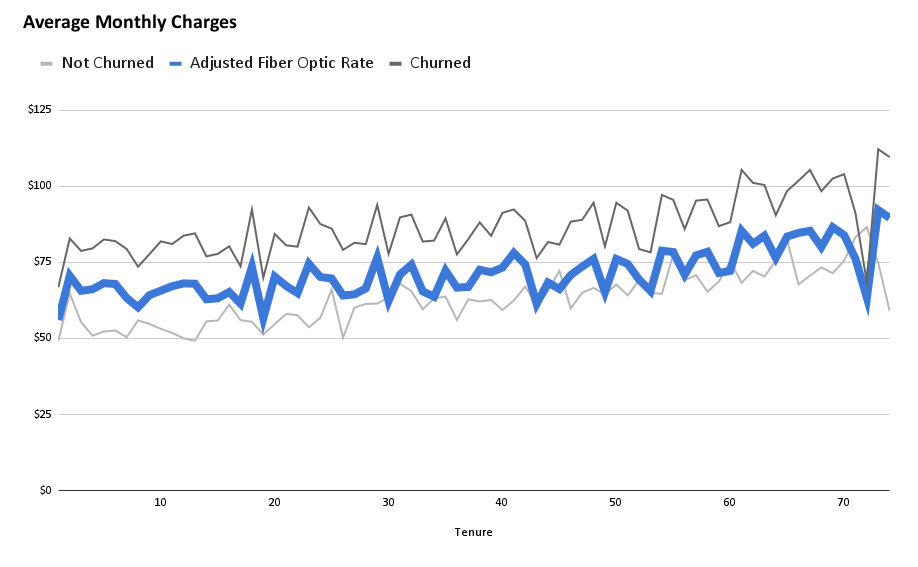

In [10]:
# Adding columns for variables I want to explore later:
df['no_online_security'] = df.online_security == 'No'
df['fiber_optic'] = df.internet_service_type == 'Fiber optic'
df['month_to_month'] = df.contract_type == 'Month-to-month'
df['pays_by_electronic_check'] = df.payment_type == 'Electronic check'

#### Takeaways:
- We can see as tenure increases, the amount of customers that stay increases
- More customers stay at a lower monthly rate between around \\$20 - \\$30 dollars
- Columns like online_security, online_backup, streaming_tv, and streaming_movies are redundant in data, so I can drop those
- My usual suspects of Contract Type, Fiber Optic, and Monthly Charges visually show some correlation
- Payment by electronic check also appears to have some correlation with churn

## Prep and split our data:

In [11]:
# This function drops columns I felt were unnecessary, encodes values, and splits the data
train, validate, test = prep_telco(df)

### Exploration

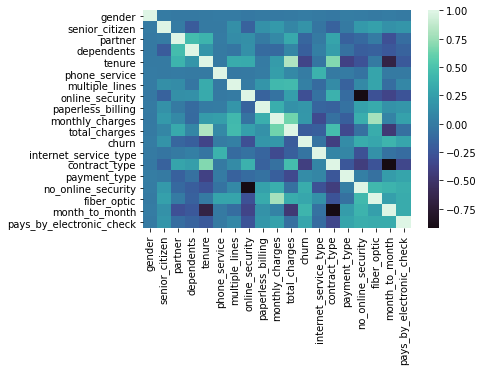

In [12]:
# High level overview of correlation
sns.heatmap(train.corr(),cmap ='mako',center=0,)
plt.show()

In [13]:
# Creating Variables to zoom in on in our exploration

quant_vars = ['tenure','monthly_charges','total_charges']

cat_vars = ['contract_type','no_online_security','fiber_optic','month_to_month','pays_by_electronic_check']

### Setting up some Hypotheses

#### Is there a correlation between month-to-month contracts and churn?
"$H_0$ = Churn is independent of month-to-month contracts"

"$H_a$ = Month-to-month contracts and churn are dependent on each other."

#### Is there a correlation between fiber_optic and churn?
"$H_0$ = Churn is independent of fiber_optic"

"$H_a$  fiber_optic and churn are dependent on each other."

#### Is there a correlation between pays_by_electronic_check and churn?
"$H_0$ = Churn is independent of pays_by_electronic_check"

"$H_a$  pays_by_electronic_check and churn are dependent on each other."

### Exploring Bivariate Stats & Analysis

- This function takes in my training data, runs a Chi2 test for my categorical variables and a Mann-Whitney test for my quantitative variables
- Examining the p-values to see if they're below my alpha of .05

contract_type 
_____________________

         chi2        p-value  degrees of freedom
0  655.497055  4.577444e-143                   2

observed:
 churn             0     1   All
contract_type                  
0              1254   928  2182
1               709    91   800
2               928    27   955
All            2891  1046  3937

expected:
              0           1
0  1602.276353  579.723647
1   587.452375  212.547625
2   701.271273  253.728727


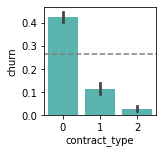


_____________________

no_online_security 
_____________________

         chi2        p-value  degrees of freedom
0  465.743759  2.703751e-103                   1

observed:
 churn                  0     1   All
no_online_security                  
0                   1774   234  2008
1                   1117   812  1929
All                 2891  1046  3937

expected:
              0           1
0  1474.505461  533.494539
1  1416.494539  512.505461


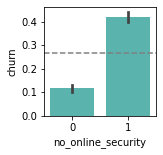


_____________________

fiber_optic 
_____________________

         chi2       p-value  degrees of freedom
0  377.090921  5.349582e-84                   1

observed:
 churn           0     1   All
fiber_optic                  
0            1871   312  2183
1            1020   734  1754
All          2891  1046  3937

expected:
              0           1
0  1603.010668  579.989332
1  1287.989332  466.010668


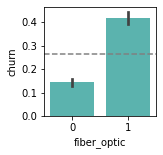


_____________________

month_to_month 
_____________________

         chi2        p-value  degrees of freedom
0  637.359844  1.253538e-140                   1

observed:
 churn              0     1   All
month_to_month                  
0               1637   118  1755
1               1254   928  2182
All             2891  1046  3937

expected:
              0           1
0  1288.723647  466.276353
1  1602.276353  579.723647


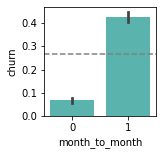


_____________________

pays_by_electronic_check 
_____________________

         chi2       p-value  degrees of freedom
0  360.227776  2.511808e-80                   1

observed:
 churn                        0     1   All
pays_by_electronic_check                  
0                         2154   439  2593
1                          737   607  1344
All                       2891  1046  3937

expected:
             0          1
0  1904.08001  688.91999
1   986.91999  357.08001


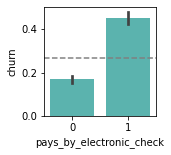


_____________________

tenure 
____________________



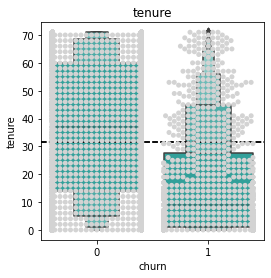

        count       mean        std  min   25%   50%    75%   max
churn                                                            
0      2891.0  36.786925  24.122903  0.0  14.0  37.0  60.00  71.0
1      1046.0  16.848948  19.543061  0.0   1.0   9.0  27.75  71.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2249227.5, pvalue=2.9678708708619156e-121)

____________________

monthly_charges 
____________________



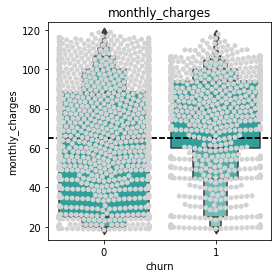

        count       mean        std    min     25%     50%      75%     max
churn                                                                      
0      2891.0  61.439761  30.976056  18.40  25.125  64.400  88.3000  118.75
1      1046.0  74.742830  24.224352  18.95  59.775  79.725  93.8375  117.80 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1142472.5, pvalue=8.934378639819184e-32)

____________________

total_charges 
____________________



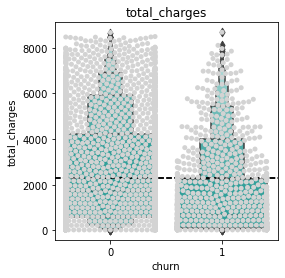

        count         mean          std   min     25%       50%        75%  \
churn                                                                        
0      2891.0  2564.279626  2323.736306  18.8  601.60  1714.950  4205.1000   
1      1046.0  1508.611950  1862.782378  19.1  114.35   679.675  2256.8625   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1981899.5, pvalue=2.5650815469479417e-50)

____________________



In [14]:
explore_bivariate(train, 'churn', cat_vars, quant_vars)

### Key takeaways:
- Statistical tests for all variables returned pvalues less than my alpha (.05)
- We can safely reject all null hypotheses, evidence shows that our target variables are NOT independent of churn
- These will be useful features for my models


### Modeling

In [15]:
# Split the data into X and y, X contains the features and y contains the target variable
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [16]:
# Get percentages of churned and not churned for my baseline

not_churned = df[df['churn']==0]
churned = df[df['churn']==1]

print(round(len(not_churned)/(len(churned)+len(not_churned)) * 100), '% of customers stayed with the company')
print(round(len(churned)/(len(churned)+len(not_churned)) * 100), '% of customers left the company')

73 % of customers stayed with the company
27 % of customers left the company


##### Baseline = 73%

### Logistic Regression Classifier
All of my model hyperparamters were chosen based on the results of a function in my explore notebook that ran through a range of hyperparameters (ex. C, n_neighbors, max_depth, etc.)

In [17]:
# Create the model
logit = LogisticRegression(C=0.2, random_state=123)
# Fit the model
logit.fit(X_train, y_train)
# Train 
y_pred = logit.predict(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

# Validate 
y_pred = logit.predict(X_validate)
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

Accuracy of Logistic Regression classifier on training set: 0.81
Accuracy of Logistic Regression classifier on validate set: 0.80


### KNN

In [18]:
# Create Model
knn = KNeighborsClassifier(n_neighbors=14, weights='uniform')
# Fit the Model
knn.fit(X_train, y_train)
# Train
y_pred = knn.predict(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

# Validate
y_pred = knn.predict(X_validate)
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.81
Accuracy of KNN classifier on validate set: 0.78


### Decision Tree Classifier

In [19]:
# Make the model
clf = DecisionTreeClassifier(max_depth=6, random_state=123)
# Fit the model
clf = clf.fit(X_train, y_train)
# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

# Validate
y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.82
Accuracy of Decision Tree classifier on validate set: 0.78


### Random Forest

In [20]:
# Make the model
rf = RandomForestClassifier(max_depth = 7, random_state=123)
# Fit the model
rf.fit(X_train, y_train)
# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

# Validate
y_pred = rf.predict(X_validate)
train_accuracy = rf.score(X_validate, y_validate)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.83
Accuracy of random forest classifier on validate set: 0.80


## Model Takeaways
- All models performed well over my baseline of 73%
- None of the train vs validate models had a difference greater than 5%
- I will move forward with my Random Forest model with Train = 83% and Validate = 80%


### Random Forest Model on Test Data

In [21]:
# Make the model
rf = RandomForestClassifier(max_depth=7, random_state=123)
# Fit the model
rf.fit(X_train, y_train)
# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)
# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)
# Test
y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.2f}'
      .format(rf.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
      .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.83
Accuracy of Random Forest classifier on validate set: 0.80
Accuracy of Random Forest classifier on test set: 0.79


##### Creating a dataframe to show feature importance chosen by the Random Forest Classifier

In [22]:
feature_importance = {'Features': X_train.columns,
                     'Importance': rf.feature_importances_}
feature_df = pd.DataFrame(feature_importance)
feature_df.sort_values(by='Importance',ascending=False)

,Features,Importance
4,tenure,0.162904
12,contract_type,0.151581
10,total_charges,0.128483
16,month_to_month,0.108617
9,monthly_charges,0.099878
15,fiber_optic,0.078205
7,online_security,0.070802
14,no_online_security,0.040616
11,internet_service_type,0.036385
17,pays_by_electronic_check,0.028924


### Takeaways:
- Some of the usual suspects are the top of the feature list (tenure, contract_type, total_charges)
- We knew month_to_month had a high rate of churn, which most likely contributed to the importance of contract_type
- Creating a fiber_optic column ended up being useful
- Interesting payment by electronic check did not end up as high on the list as I thought

### Create CSV

In [23]:
# Create Probability columns
proba_test = rf.predict_proba(X_test)
# Create dataframe
proba_df = pd.DataFrame(proba_test, columns=rf.classes_.tolist())
# Reset the index
reset_test = test.reset_index()
# Concat probability to test df
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
# Renaming prediction values
test_proba_df = test_proba_df.rename(columns={0: 'not_churn', 1:'churn_yes'})
# Creating predicted column
test_proba_df['predicted'] = np.where(test_proba_df.not_churn > test_proba_df.churn_yes, 'not_churn', 'churn')
# New df with index from customer id
csv_df = test_proba_df[['index', 'churn', 'not_churn', 'churn_yes', 'predicted']]
# Save CSV file
csv_df.to_csv('predictions.csv')

### Conclusion
- We have a model that will predict whether or not a customer will churn with an accuracy of 79%
- Tenure, total and monthly charges are some of our top drivers of churn

### Recommendations
- We continue to focus on retaining customers in the month_to_month plan
- Focus on the the price threshold of customers that are churning vs not churning

### Moving forward
- With more time, I would like to append my data with my adjusted monthly_charges column from my previous project to see how it would affect my models
- It would also be interesting to see the results of this project after spending more time with scaling the data and feature engineering

# Thank you for listening!